# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

# TODO Check image read code on Nimble box

In [118]:
import numpy as np
import os
import skimage
#from scipy.misc import imread, imresize
import datetime
import os
import pandas as pd


from sys import platform
if platform == "darwin":
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

We set the random seed so that the results don't vary drastically.

In [119]:
import warnings
warnings.filterwarnings('ignore')

In [120]:
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
from keras import backend as K
import random as rn
np.random.seed(30)
rn.seed(30)
tf.set_random_seed(30)
%matplotlib inline


# setting display format so that large values are shown properly
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


sns.set_style(style='dark')
sns.set_context("notebook")

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [121]:
batch_size = 10
base_path = 'data/Project_data/'
#base_path = 'Project_data/'

In [122]:
train_doc = np.random.permutation(open(base_path+'train.csv').readlines())
val_doc = np.random.permutation(open(base_path + 'val.csv').readlines())

# Explore Data

In [123]:
def read_data(source):
    df = pd.read_csv(source, header=None)
    df[['folder', 'name', 'class']] = df[0].str.split(';', expand=True)
    return df

In [124]:
def explore_data(source):
    df = read_data(source)
    print(df['class'].value_counts())

In [125]:
# Train data
explore_data(base_path+'train.csv')

1    137
3    137
0    136
2    130
4    123
Name: class, dtype: int64


In [126]:
# Val data
explore_data(base_path+'val.csv')

1    23
2    22
3    21
0    18
4    16
Name: class, dtype: int64


We can see that data is evenly balance across all the classes.

In [127]:
def get_image(folder, index):
    image_name = os.listdir(folder)[index]
    image = skimage.io.imread(folder + "/" + image_name).astype(np.float32)
    return image

In [128]:
def get_image_dimensions(row, source_path):
    y, x, _ = get_image(source_path + row['folder'], 0).shape
    return str(x) + "-" + str(y)

In [129]:
def explore_images(source_file, source_path):
    df = read_data(source_file)
    df['shape'] = df.apply(get_image_dimensions, axis=1, args=[source_path])
    print(df['shape'].value_counts())
    return df

In [130]:
# Exploring Train images
explore_images(base_path+'train.csv', base_path+'train/')

160-120    479
360-360    184
Name: shape, dtype: int64


,0,folder,name,class,shape
0,WIN_20180925_17_08_43_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_08_43_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
1,WIN_20180925_17_18_28_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_18_28_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
2,WIN_20180925_17_18_56_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_18_56_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
3,WIN_20180925_17_19_51_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_19_51_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
4,WIN_20180925_17_20_14_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_20_14_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
5,WIN_20180925_17_21_28_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_21_28_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
6,WIN_20180925_17_22_55_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_22_55_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
7,WIN_20180925_17_24_49_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_24_49_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
8,WIN_20180925_17_26_25_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_26_25_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
9,WIN_20180925_17_26_51_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_26_51_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120


In [131]:
# Exploring Val images
explore_images(base_path+'val.csv', base_path+'val/')

160-120    62
360-360    38
Name: shape, dtype: int64


,0,folder,name,class,shape
0,WIN_20180925_17_17_04_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_17_04_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
1,WIN_20180925_17_43_01_Pro_Left_Swipe_new;Left_...,WIN_20180925_17_43_01_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
2,WIN_20180925_18_01_40_Pro_Left_Swipe_new;Left_...,WIN_20180925_18_01_40_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
3,WIN_20180925_18_03_21_Pro_Left_Swipe_new;Left_...,WIN_20180925_18_03_21_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
4,WIN_20180926_16_46_22_Pro_Left_Swipe_new;Left_...,WIN_20180926_16_46_22_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
5,WIN_20180926_16_47_09_Pro_Left_Swipe_new;Left_...,WIN_20180926_16_47_09_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
6,WIN_20180926_17_05_38_Pro_Left_Swipe_new;Left_...,WIN_20180926_17_05_38_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
7,WIN_20180926_17_08_09_Pro_Left_Swipe_new;Left_...,WIN_20180926_17_08_09_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
8,WIN_20180926_17_09_33_Pro_Left_Swipe_new;Left_...,WIN_20180926_17_09_33_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120
9,WIN_20180926_17_15_35_Pro_Left_Swipe_new;Left_...,WIN_20180926_17_15_35_Pro_Left_Swipe_new,Left_Swipe_new,0,160-120


We can see there are two dimensions of the images **160*120** and **360*360**. We will need to bring the images to same dimension when passing from generator.

## We will resize the bigger image to 120X120 and smaller will be cropped to 120X120

In [132]:
starting_image_shape = (120, 120)

In [133]:
def resize_image(image,image_shape):
    return skimage.transform.resize(image, image_shape)

In [134]:
def crop(image):
    return image[0:120, 20:140]

In [142]:
def modify_image(image, image_shape):
    if (image.shape[0] == image.shape[1]):
        return resize_image(image, image_shape)
    else:
        return resize_image(crop(image), image_shape)

In [143]:
def crop_center(img, cropx, cropy):
    print(img.shape)
    y, x, _ = img.shape
    startx = x // 2 - (cropx // 2)
    starty = y // 2 - (cropy // 2)
    return img[starty:starty + cropy, startx:startx + cropx]

160-120    479
360-360    184
Name: shape, dtype: int64


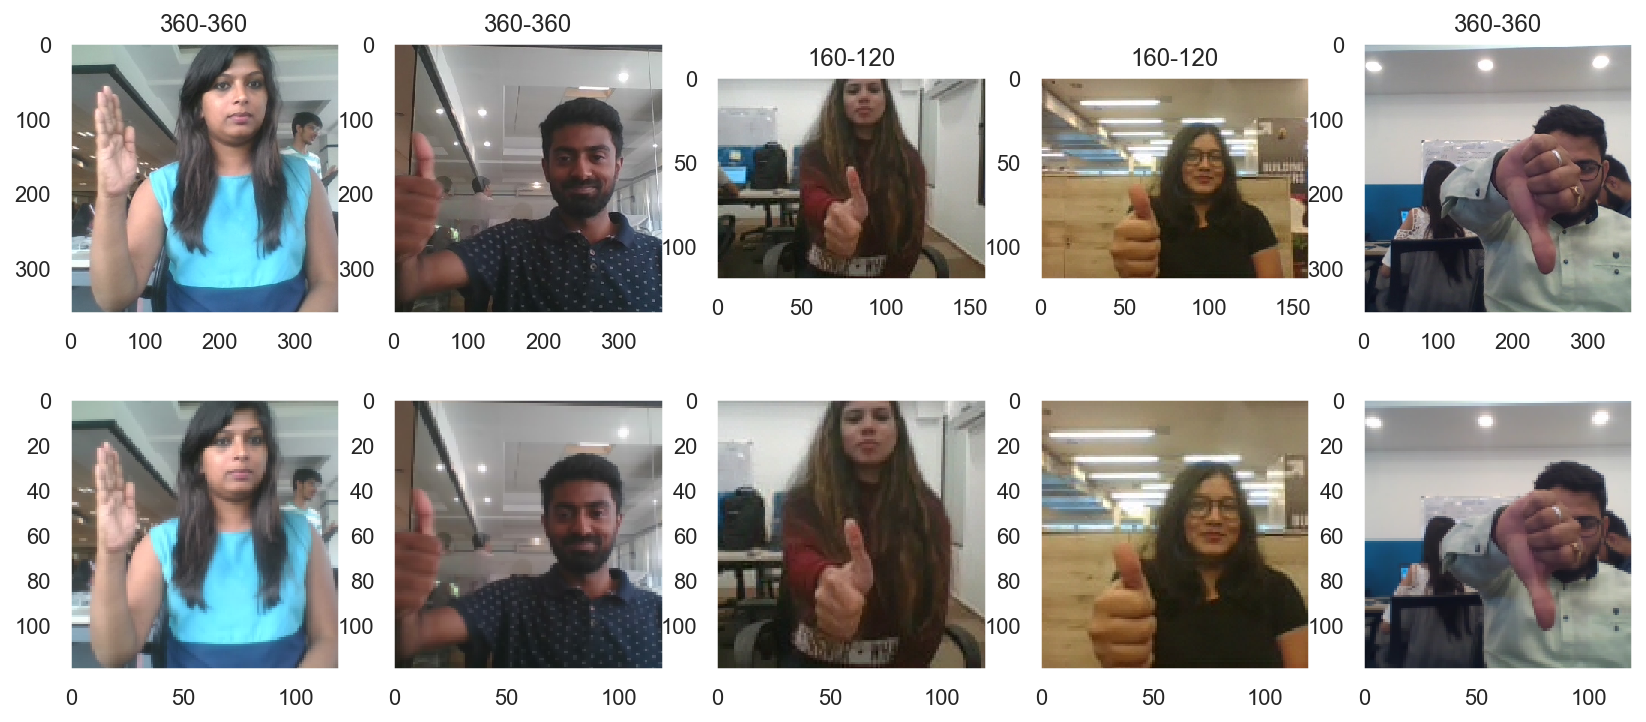

In [144]:
sample_size = 5
df = explore_images(base_path + 'train.csv', base_path + 'train/')
sample = df.sample(n=sample_size)
fig, axs = plt.subplots(2, 5, figsize=(14, 6))
plot_index = 1
for index, row in sample.head(n=sample_size).iterrows():
    image = get_image(base_path + 'train/' + row['folder'], 5)
    plt.subplot(2, 5, plot_index, title=row['shape'])
    plt.imshow(image.astype('uint8'), interpolation='nearest')
    plt.subplot(2, 5, plot_index + sample_size)
    image = modify_image(image, starting_image_shape)
    plt.imshow(image.astype('uint8'), interpolation='nearest')
    plot_index += 1

plt.show()

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [145]:
train_path = base_path + 'train'
val_path = base_path + 'val'

In [146]:
def nomalize(array):
    #test = (array - np.min(array)) / (np.max(array) - np.min(array))
    #print(test)
    return (array - np.min(array)) / (np.max(array) - np.min(array))

In [147]:
# TODO Refactor this method to remove duplicate and pass flag to append image to processedImages


def generator(source_path,
              folder_list,
              batch_size,
              list_of_frames,
              image_shape,
              test_generator=False,
              verbose=False,
              processedImages=[]):
    print('Source path = ', source_path, '; batch size =', batch_size)
    # create a list of image numbers you want to use for a particular video
    img_idx = list_of_frames
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(t) // batch_size  # calculate the number of batches
        if verbose:
            print("Number of batches ", num_batches)
        for batch in range(
                num_batches):  # we iterate over the number of batches
            if verbose:
                print("Executing batch ", batch)
            # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_data = np.zeros(
                (batch_size, len(img_idx), image_shape[0], image_shape[1], 3))
            # batch_labels is the one hot representation of the output
            batch_labels = np.zeros((batch_size, 5))
            for folder in range(batch_size):  # iterate over the batch_size
                if verbose:
                    print("Executing folder ", folder)
                # read all the images in the folder
                imgs = os.listdir(source_path + '/' +
                                  t[folder +
                                    (batch * batch_size)].split(';')[0])
                # Iterate iver the frames/images of a folder to read them in
                for idx, item in enumerate(img_idx):
                    if test_generator:
                        processedImages.append(
                            source_path + '/' +
                            t[folder +
                              (batch * batch_size)].strip().split(';')[0] +
                            "_" + str(item))
                    image = get_image(
                        source_path + '/' +
                        t[folder + (batch * batch_size)].strip().split(';')[0],
                        item)

                    # Here, we are croping and resizing the image based on its dimensions
                    image = modify_image(image, image_shape)

                    # crop the images and resize them. Note that the images are of 2 different shape
                    # and the conv3D will throw error if the inputs in a batch have different shapes
                    image = image.astype('float64')
                    batch_data[folder, idx, :, :, 0] = nomalize(
                        image[:, :, 0])  # normalise and feed in the image
                    batch_data[folder, idx, :, :, 1] = nomalize(
                        image[:, :, 1])  # normalise and feed in the image
                    batch_data[folder, idx, :, :, 2] = nomalize(
                        image[:, :, 2])  # normalise and feed in the image

                batch_labels[folder,
                             int(t[folder +
                                   (batch *
                                    batch_size)].strip().split(';')[2])] = 1
            # you yield the batch_data and the batch_labels, remember what does yield do
            yield batch_data, batch_labels

        remaining_folder = len(t) % batch_size
        if remaining_folder > 0:
            # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_data = np.zeros((remaining_folder, len(img_idx),
                                   image_shape[0], image_shape[1], 3))
            # batch_labels is the one hot representation of the output
            batch_labels = np.zeros((remaining_folder, 5))

            if verbose:
                print("Executing last batch ")
            for folder in range(
                    remaining_folder):  # iterate over the batch_size
                if verbose:
                    print("Executing folder ", folder)
                # read all the images in the folder
                imgs = os.listdir(source_path + '/' +
                                  t[folder +
                                    (num_batches * batch_size)].split(';')[0])
                # Iterate iver the frames/images of a folder to read them in
                for idx, item in enumerate(img_idx):
                    if test_generator:
                        processedImages.append(source_path + '/' + t[folder + (
                            num_batches * batch_size)].strip().split(';')[0] +
                                               "_" + str(item))
                    image = get_image(
                        source_path + '/' +
                        t[folder +
                          (num_batches * batch_size)].strip().split(';')[0],
                        item)

                    # Here, we are croping and resizing the image based on its dimensions
                    image = modify_image(image, image_shape)

                    # crop the images and resize them. Note that the images are of 2 different shape
                    # and the conv3D will throw error if the inputs in a batch have different shapes
                    image = image.astype('float64')
                    batch_data[folder, idx, :, :, 0] = nomalize(
                        image[:, :, 0])  # normalise and feed in the image
                    batch_data[folder, idx, :, :, 1] = nomalize(
                        image[:, :, 1])  # normalise and feed in the image
                    batch_data[folder, idx, :, :, 2] = nomalize(
                        image[:, :, 2])  # normalise and feed in the image

                batch_labels[folder,
                             int(t[folder +
                                   (batch *
                                    batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels
        if test_generator:
            break
        # write the code for the remaining data points which are left after full batches

# Testing image generator

In [149]:
def test_image_generator(path, data, number_of_frames, current_batch_size):
    processedImages = []
    generator_to_validate = generator(path,
                                      data,
                                      current_batch_size,
                                      list(range(0, number_of_frames)),
                                      starting_image_shape,
                                      True,
                                      False,
                                      processedImages=processedImages)
    total_images = len(data) * number_of_frames
    image_count = 0
    for data in generator_to_validate:
        image_count += data[0].shape[0] * data[0].shape[1]
    print("Images generated: ", image_count)
    print("Images should be generated: ", total_images)
    assert len(processedImages) == len(
        set(processedImages)), "the generator did not return all the images"
    assert image_count == total_images, "the generator did not return all the images"

In [150]:
test_image_generator(train_path, train_doc, 10, 16)
test_image_generator(train_path, train_doc, 10, 10)
test_image_generator(val_path, val_doc, 10, 16)
test_image_generator(val_path, val_doc, 10, 10)

Source path =  data/Project_data/train ; batch size = 16
Images generated:  6630
Images should be generated:  6630
Source path =  data/Project_data/train ; batch size = 10
Images generated:  6630
Images should be generated:  6630
Source path =  data/Project_data/val ; batch size = 16
Images generated:  1000
Images should be generated:  1000
Source path =  data/Project_data/val ; batch size = 10
Images generated:  1000
Images should be generated:  1000


Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [151]:
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 5  # choose the number of epochs
print('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 5


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [152]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.regularizers import l2

In [153]:
def optimize_model(model, optimizer, learning_rate=0.01):
    if optimizer == "sgd":
        print("SGD optimizer with learning rate: ", learning_rate)
        model_optimizer = optimizers.SGD(lr=learning_rate)
    else:
        print("ADAM optimizer with learning rate: ", learning_rate)
        model_optimizer = optimizers.Adam(lr=learning_rate)

    model.compile(optimizer=model_optimizer,
                  loss='categorical_crossentropy',
                  metrics=['categorical_accuracy'])

### This approach of running model and collecting metrics is adopted from our previous project `Telecom Churn case study`

In [201]:
class ModelParam:
    def __init__(self, params):
        self.learning_rate = params["learning_rate"]
        self.optmizer = params["optmizer"]

        self.batch_size = params["batch_size"]
        self.video_frames = list(
            range(params["frames"][0], params["frames"][1]))
        self.learning_rate = params["learning_rate"]
        self.num_epochs = params["num_epochs"]
        self.batch_normalize = params["batch_normalize"]
        self.filters = params["filters"]
        self.dropouts = params["dropouts"]
        self.dense_input = params["dense_input"]
        self.image_shape = params["image_shape"]
        self.input_shape = (len(self.video_frames), self.image_shape[0],
                            self.image_shape[1], 3)
        dropout = (len([d for d in self.dropouts if d is not None]) > 0)
        regularize = self.batch_normalize or dropout
        self.name = params["model_name"] + "_" + self.optmizer + "_" + str(
            len(self.filters) +
            len(self.dense_input)) + "_" + "layers" + "_" + str(
                self.num_epochs) + "_" + "epochs" + "_" + (
                    "regularized" if regularize else "not_regularized")
        if (regularize):
            if (self.batch_normalize):
                self.name = self.name + "_BN"
            if (dropout):
                self.name = self.name + "_DO"

        assert (len(self.filters) + len(self.dense_input)) == len(
            self.dropouts
        ), 'the filters and dense layers should sum up to number of dropouts'

    def print_params(self):
        attrs = vars(self)
        print("Model Params: ")
        for item in attrs.items():
            print(item)

In [155]:
def convert_history_to_data_frame(model_name, history):
    df = pd.DataFrame.from_dict(history)
    df['epoch'] = df.index
    df['name'] = model_name
    return df

In [220]:
def run_model(model, params, show_summary=True):
    params.print_params()
    optimize_model(model, params.optmizer, learning_rate=params.learning_rate)
    if show_summary:
        print(model.summary())

    curr_dt_time = datetime.datetime.now()

    train_generator = generator(train_path,
                                train_doc,
                                params.batch_size,
                                list_of_frames=params.video_frames,
                                image_shape=params.image_shape)
    val_generator = generator(val_path,
                              val_doc,
                              params.batch_size,
                              list_of_frames=params.video_frames,
                              image_shape=params.image_shape)
    model_name = 'model_init' + '_' + str(curr_dt_time).replace(
        ' ', '').replace(':', '_') + '/'

    if not os.path.exists(model_name):
        os.mkdir(model_name)

    filepath = model_name + \
        'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

    checkpoint = ModelCheckpoint(filepath,
                                 monitor='val_loss',
                                 verbose=1,
                                 save_best_only=False,
                                 save_weights_only=False,
                                 mode='auto',
                                 period=1)

    LR = ReduceLROnPlateau(monitor='val_loss',
                           factor=0.4,
                           patience=2,
                           min_lr=0.000001,
                           verbose=1)  # write the REducelronplateau code here
    callbacks_list = [checkpoint, LR]
    if (num_train_sequences % params.batch_size) == 0:
        steps_per_epoch = int(num_train_sequences / params.batch_size)
    else:
        steps_per_epoch = (num_train_sequences // params.batch_size) + 1

    if (num_val_sequences % params.batch_size) == 0:
        validation_steps = int(num_val_sequences / params.batch_size)
    else:
        validation_steps = (num_val_sequences // params.batch_size) + 1

    history = model.fit_generator(train_generator,
                                  steps_per_epoch=steps_per_epoch,
                                  epochs=params.num_epochs,
                                  verbose=1,
                                  callbacks=callbacks_list,
                                  validation_data=val_generator,
                                  validation_steps=validation_steps,
                                  class_weight=None,
                                  workers=1,
                                  initial_epoch=0)
    fig = plt.figure(figsize=(10, 8))
    plt.plot(history.history['loss'],
             label='Categorical crossentropy (training data)')
    plt.plot(history.history['val_loss'],
             label='Categorical crossentropy (validation data)')
    plt.plot(history.history['categorical_accuracy'],
             label='Accuracy (training data)')
    plt.plot(history.history['val_categorical_accuracy'],
             label='Accuracy (validation data)')

    plt.title('Model performance: ' + params.name)
    plt.ylabel('Loss value')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.show()
    return convert_history_to_data_frame(params.name, history.history)

Reference: https://www.machinecurve.com/index.php/2019/10/18/a-simple-conv3d-example-with-keras/

In [215]:
def create_cnn_model(model_param):
    model = Sequential()
    for index, f in enumerate(model_param.filters):
        if index == 0:
            model.add(
                Conv3D(f,
                       kernel_size=(3, 3, 3),
                       activation='relu',
                       kernel_initializer='he_uniform',
                       input_shape=model_param.input_shape,
                       padding='same'))
        else:
            model.add(
                Conv3D(f,
                       kernel_size=(3, 3, 3),
                       activation='relu',
                       kernel_initializer='he_uniform',
                       padding='same'))
        if model_param.batch_normalize:
            model.add(BatchNormalization())

        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        if model_param.dropouts[index]:
            model.add(Dropout(model_param.dropouts[index]))

    model.add(Flatten())
    for index, d in enumerate(model_param.dense_input):
        model.add(Dense(d, activation='relu', kernel_initializer='he_uniform'))
        dropout_index = len(model_param.filters) + index
        if model_param.dropouts[dropout_index]:
            model.add(Dropout(model_param.dropouts[dropout_index]))

    model.add(Dense(5, activation='softmax'))
    return model

In [216]:
model_stats = None

In [217]:
def collect_stats(df):
    global model_stats
    if model_stats is not None:
        pd.concat([model_stats, df], axis=0)
    else:
        model_stats = df
    return df

Let us start with 3 layer CNN model with no regularization and batch size 10

In [218]:
params = {
    "learning_rate": 0.001,
    "optmizer": "sgd",
    "batch_size": 10,
    "frames": (0, 30),
    "model_name": "cnn",
    "num_epochs": 6,
    "filters": [16, 16, 32],
    "batch_normalize": False,
    "dropouts": [None, None, None, None],
    "dense_input": [128],
    "image_shape": (120, 120)
}
model_param = ModelParam(params)
model = create_cnn_model(model_param)

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

Model Params: 
('learning_rate', 0.001)
('optmizer', 'sgd')
('batch_size', 10)
('video_frames', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
('num_epochs', 6)
('batch_normalize', False)
('filters', [16, 16, 32])
('dropouts', [None, None, None, None])
('dense_input', [128])
('image_shape', (120, 120))
('input_shape', (30, 120, 120, 3))
('name', 'cnn_sgd_4_layers_6_epochs_not_regularized')
SGD optimizer with learning rate:  0.001
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_124 (Conv3D)          (None, 30, 120, 120, 16)  1312      
_________________________________________________________________
max_pooling3d_124 (MaxPoolin (None, 15, 60, 60, 16)    0         
_________________________________________________________________
conv3d_125 (Conv3D)          (None, 15, 60, 60, 16)    6928      
________________

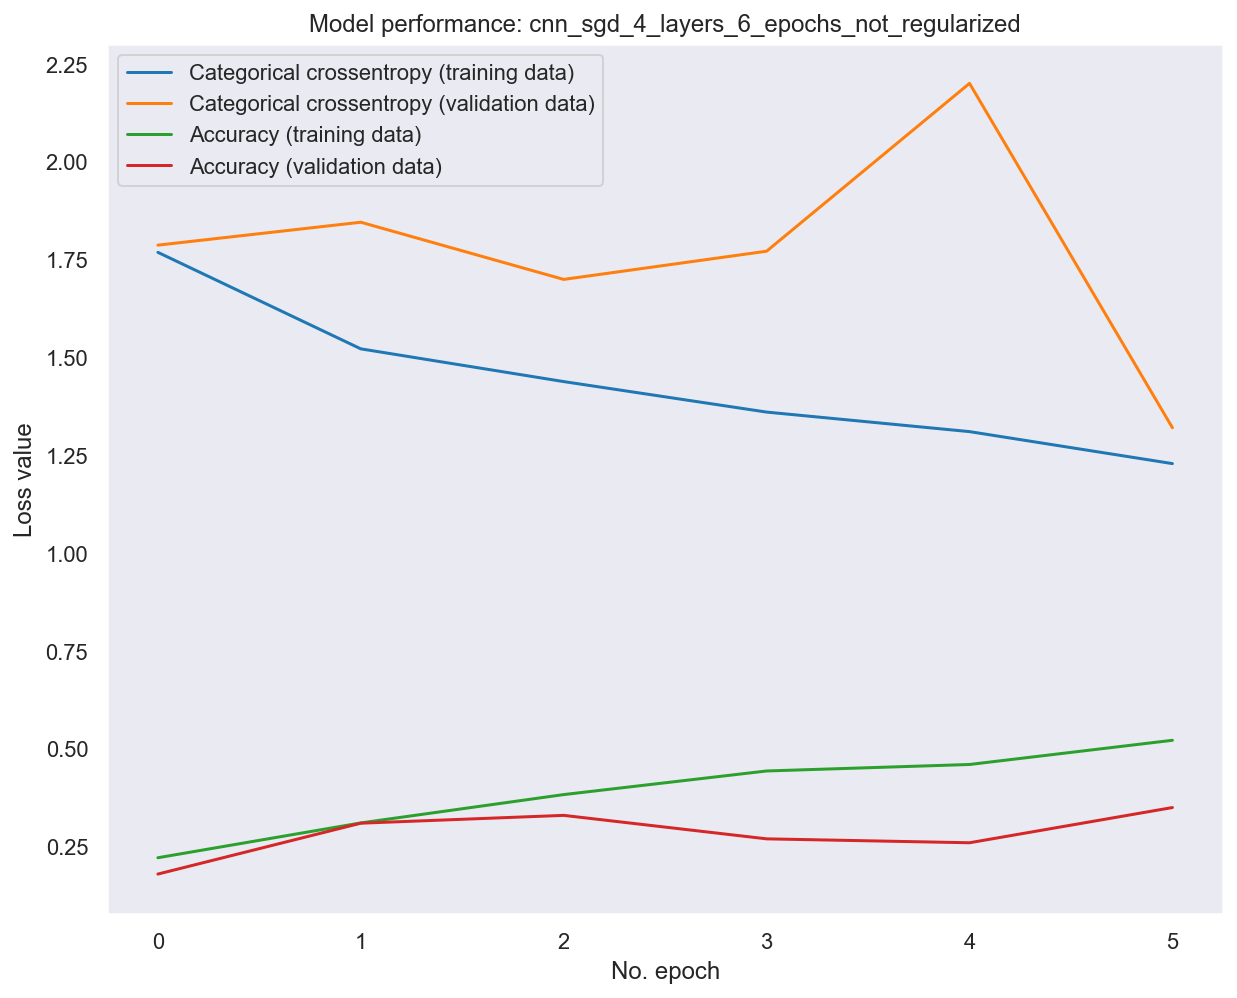

,val_loss,val_categorical_accuracy,loss,categorical_accuracy,lr,epoch,name
0,1.7872,0.1800,1.7688,0.2217,0.0010,0,cnn_sgd_4_layers_6_epochs_not_regularized
1,1.8457,0.3100,1.5222,0.3107,0.0010,1,cnn_sgd_4_layers_6_epochs_not_regularized
2,1.6996,0.3300,1.4385,0.3831,0.0010,2,cnn_sgd_4_layers_6_epochs_not_regularized
3,1.7717,0.2700,1.3606,0.4434,0.0010,3,cnn_sgd_4_layers_6_epochs_not_regularized
4,2.2006,0.2600,1.3106,0.4600,0.0010,4,cnn_sgd_4_layers_6_epochs_not_regularized
5,1.3205,0.3500,1.2289,0.5219,0.0004,5,cnn_sgd_4_layers_6_epochs_not_regularized


In [219]:
df = run_model(model, model_param)
collect_stats(df)

We can see that we did not get good validation accuracy. Let us try to change the optimizer

We see improvement from the previous model. Let us increase the number of epoch to see how it affects the accuracy.

In [221]:
params = {
    "learning_rate": 0.001,
    "optmizer": "adam",
    "batch_size": 10,
    "frames": (0, 30),
    "model_name": "cnn",
    "num_epochs": 6,
    "filters": [16, 16, 32],
    "batch_normalize": False,
    "dropouts": [None, None, None, None],
    "dense_input": [128],
    "image_shape": (120, 120)
}
model_param = ModelParam(params)
model = create_cnn_model(model_param)

Model Params: 
('learning_rate', 0.001)
('optmizer', 'adam')
('batch_size', 10)
('video_frames', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
('num_epochs', 6)
('batch_normalize', False)
('filters', [16, 16, 32])
('dropouts', [None, None, None, None])
('dense_input', [128])
('image_shape', (120, 120))
('input_shape', (30, 120, 120, 3))
('name', 'cnn_adam_4_layers_6_epochs_not_regularized')
ADAM optimizer with learning rate:  0.001
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_127 (Conv3D)          (None, 30, 120, 120, 16)  1312      
_________________________________________________________________
max_pooling3d_127 (MaxPoolin (None, 15, 60, 60, 16)    0         
_________________________________________________________________
conv3d_128 (Conv3D)          (None, 15, 60, 60, 16)    6928      
_____________

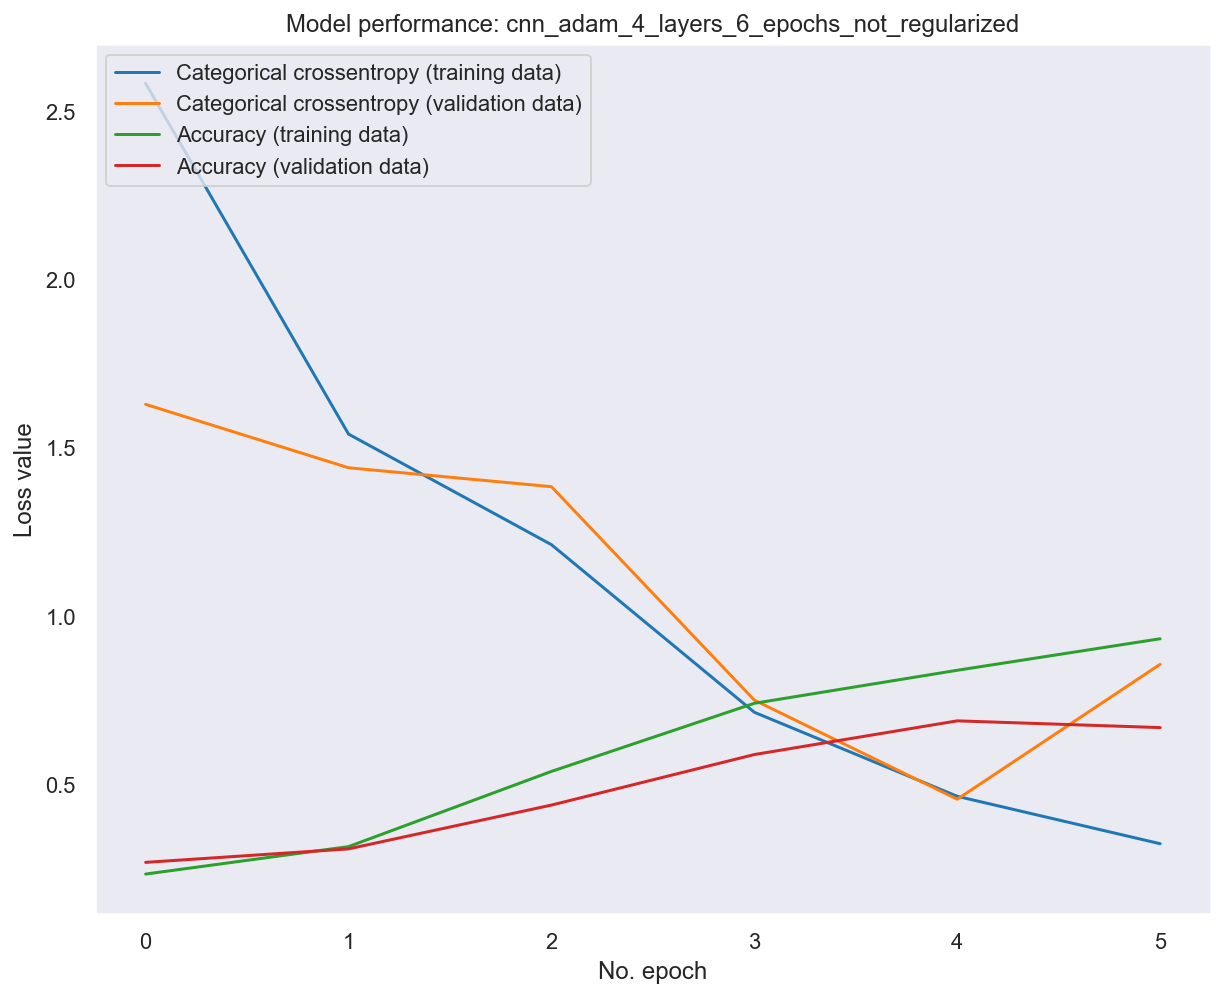

,val_loss,val_categorical_accuracy,loss,categorical_accuracy,lr,epoch,name
0,1.6292,0.2700,2.5818,0.2353,0.0010,0,cnn_adam_4_layers_6_epochs_not_regularized
1,1.4411,0.3100,1.5410,0.3167,0.0010,1,cnn_adam_4_layers_6_epochs_not_regularized
2,1.3849,0.4400,1.2128,0.5400,0.0010,2,cnn_adam_4_layers_6_epochs_not_regularized
3,0.7515,0.5900,0.7154,0.7421,0.0010,3,cnn_adam_4_layers_6_epochs_not_regularized
4,0.4573,0.6900,0.4661,0.8401,0.0010,4,cnn_adam_4_layers_6_epochs_not_regularized
5,0.8579,0.6700,0.3254,0.9336,0.0010,5,cnn_adam_4_layers_6_epochs_not_regularized


In [222]:
df = run_model(model, model_param)
collect_stats(df)